In [10]:
! pip install gurobipy
import pandas as pd
import numpy as np
import numpy
import gurobipy as gp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.8 MB/s 


In [ ]:
# This is where we read the csv file ROI_data.csv
ROIdf = pd.read_csv('ROI_data.csv') 
ROIdf

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


# Allocation based on 1st Company's ROI

In [ ]:
#objective vector
obj1 = ROIdf.drop(columns= 'Platform').iloc[0].to_list()
obj1 = numpy.array(obj1)
obj1

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

In [ ]:
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint
A[2,:] = [1,0,0,0,0,0,0,0,0,0] # Print individual constraint
A[3,:] = [0,1,0,0,0,0,0,0,0,0] # TV individual constraint
A[4,:] = [0,0,1,0,0,0,0,0,0,0] # SEO individual constraint
A[5,:] = [0,0,0,1,0,0,0,0,0,0] # AdWords individual constraint
A[6,:] = [0,0,0,0,1,0,0,0,0,0] # Facebook individual constraint
A[7,:] = [0,0,0,0,0,1,0,0,0,0] # LinkedIn individual constraint
A[8,:] = [0,0,0,0,0,0,1,0,0,0] # Instagram individual constraint
A[9,:] = [0,0,0,0,0,0,0,1,0,0] # Snapchat individual constraint
A[10,:] = [0,0,0,0,0,0,0,0,1,0] # Twitter individual constraint
A[11,:] = [0,0,0,0,0,0,0,0,0,1] # Email individual constraint
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint

b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [ ]:
budgetModel1 = gp.Model() # initialize an empty model

budgetModX1 = budgetModel1.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon1 = budgetModel1.addMConstrs(A, budgetModX1, sense, b) # add the constraints to the model
budgetModel1.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel1.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel1.Params.TimeLimit = 3600



Restricted license - for non-production use only - expires 2023-10-25


In [ ]:
budgetModel1.optimize() # solve the LP
print("Using ROI data obtained from the first consulting company, we can make a maximum profit of", round(((budgetModel1.objVal)*1000),2),"K Dollars")

Using ROI data obtained from the first consulting company, we can make a maximum profit of 456.0 K Dollars


In [ ]:
allocation_1 = budgetModX1.x
print(allocation_1)
print(allocation_1[1] ,"M for TV,",allocation_1[3] , "M for Adwords,",allocation_1[6], "M for Instagram, and" ,allocation_1[9], "M for Email")  # how many M per channel

[0. 3. 0. 1. 0. 0. 3. 0. 0. 3.]
3.0 M for TV, 1.0 M for Adwords, 3.0 M for Instagram, and 3.0 M for Email


# Allocation based on 2nd Company's ROI

In [ ]:
obj2 = ROIdf.drop(columns= 'Platform').iloc[1].to_list()
obj2 = numpy.array(obj2)
obj2

array([0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037,
       0.026])

In [ ]:
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint
A[2,:] = [1,0,0,0,0,0,0,0,0,0] # Print individual constraint
A[3,:] = [0,1,0,0,0,0,0,0,0,0] # TV individual constraint
A[4,:] = [0,0,1,0,0,0,0,0,0,0] # SEO individual constraint
A[5,:] = [0,0,0,1,0,0,0,0,0,0] # AdWords individual constraint
A[6,:] = [0,0,0,0,1,0,0,0,0,0] # Facebook individual constraint
A[7,:] = [0,0,0,0,0,1,0,0,0,0] # LinkedIn individual constraint
A[8,:] = [0,0,0,0,0,0,1,0,0,0] # Instagram individual constraint
A[9,:] = [0,0,0,0,0,0,0,1,0,0] # Snapchat individual constraint
A[10,:] = [0,0,0,0,0,0,0,0,1,0] # Twitter individual constraint
A[11,:] = [0,0,0,0,0,0,0,0,0,1] # Snapchat individual constraint
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint

b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [ ]:
budgetModel2 = gp.Model() # initialize an empty model

budgetModX2 = budgetModel2.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon2 = budgetModel2.addMConstrs(A, budgetModX2, sense, b) # add the constraints to the model
budgetModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel2.Params.TimeLimit = 3600



In [ ]:
budgetModel2.optimize() # solve the LP
print("Using ROI data obtained from the Second consulting company, we can make a maximum profit of", round((budgetModel2.objVal)*1000,2),"K Dollars")

Using ROI data obtained from the Second consulting company, we can make a maximum profit of 456.0 K Dollars


In [ ]:
allocation_2=budgetModX2.x
print(allocation_2)
print(allocation_2[0] ,"M for Print,",allocation_2[3] , "M for Adwords,",allocation_2[4], "M for Facebook, and" ,allocation_2[5], "M for Linkedin")  # how many M per channel

[3. 0. 0. 1. 3. 3. 0. 0. 0. 0.]
3.0 M for Print, 1.0 M for Adwords, 3.0 M for Facebook, and 3.0 M for Linkedin


# Comparing Allocations

In [ ]:
channels= ROIdf.columns[1:]
graphdf = pd.DataFrame()
graphdf['Channel']  = channels
graphdf['Allocation 1'] = allocation_1
graphdf['Allocation 2'] = allocation_2
graphdf

,Channel,Allocation 1,Allocation 2
0,Print,0.0,3.0
1,TV,3.0,0.0
2,SEO,0.0,0.0
3,AdWords,1.0,1.0
4,Facebook,0.0,3.0
5,LinkedIn,0.0,3.0
6,Instagram,3.0,0.0
7,Snapchat,0.0,0.0
8,Twitter,0.0,0.0
9,Email,3.0,0.0


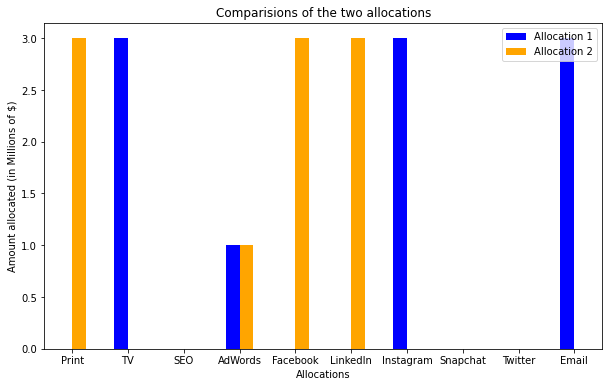

In [ ]:
ax = graphdf.plot.bar(color=["blue","Orange"], rot=0, title="Comparisions of the two allocations")
ax.set_xlabel("Allocations")
ax.set_ylabel("Amount allocated (in Millions of $)")
plt.gcf().set_size_inches(10, 6)
ax.set_xticklabels(channels, rotation=0)
plt.show()

Both the distributions ROIs give the same profit of 456K Dollars but for different allocations, The allocation based on first ROI implies to invest 3M Dollars in TV, Instagram and Email and 1M Dollars in Adwords whereas the allocation based on second ROI implies to invest 3M Dollars in Print, Facebook and LinkedIn and 1M Dollars in Adwords.

Both allocations differ majorly except for Adwords, both the allocations suggest investing in different channels for reaching out to people.

Also, in both cases, there is no allocation for SEO, Snapchat, and Twitter channels.

Assuming the first ROI data is correct, if you were to use the second allocation, how much lower would the objective be relative to the optimal objective?

To answer this question, we substitute the optimal allocations obtained from the second ROI data, into the objective of the first ROI data to obtain the revenue for this case:

In [ ]:
print("Using ROI data obtained from the first consulting company, and optimal allocation obtained from second ROI data, we can make a maximum profit of", round((obj1@allocation_2)*1000,2),"K Dollars")

Using ROI data obtained from the first consulting company, and optimal allocation obtained from second ROI data, we can make a maximum profit of 252.0 K Dollars


Using ROI data obtained from the First consulting company, and substituting the optimal allocation obtained from second allocation, the objective would be 252K Dollars, 204k Dollars lower than the optimal revenue/objective obtained by using first ROI objective and first optimal allocation.

Similarly, If we use the allocation obtained from second consulting company, and substitute the objective obtained from the first ROI, we get the revenue for that particular case:

In [ ]:
print("Using ROI data obtained from the first consulting company, and optimal allocation obtained from second ROI data, we can make a maximum profit of", round((obj2@allocation_1)*1000,2),"K Dollars")

Using ROI data obtained from the first consulting company, and optimal allocation obtained from second ROI data, we can make a maximum profit of 264.0 K Dollars


The allocation in the second case is 264K Dollars, 192K dollars lower than the optimal revenue obtained by using second ROI objective and second optimal allocation. 

Based on the above analysis, suggestion from our boss' experience of considering multiple ROI data is useful because, if we consider second ROI data to be actually matching the market trends, and we perform optimization of revenue using allocations obtained by using first company's ROI data, we would lose out on 192K Dollars and same for the other case i.e. if we consider First ROI data to be actually matching the market trends, and we perform optimization the revenue using allocations obtained by using second company's ROI data, we would be losing out on 204K dollars.

# Checking for third constraint 

To examine whether the third constraint above of each investment to be capped at 3M is useful or not, let us run a model without any of those constraints, on both, First ROI data and Second ROI data.


In [ ]:
A = np.zeros((3,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint # Email individual constraint
A[2,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint

b = np.array([0,0,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<']) # all constraints are less than or equal constraints

budgetModel3 = gp.Model() # initialize an empty model

budgetModX3 = budgetModel3.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon3 = budgetModel3.addMConstrs(A, budgetModX3, sense, b) # add the constraints to the model
budgetModel3.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel3.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel3.Params.TimeLimit = 3600
budgetModel3.optimize() # solve the LP
allocation3= budgetModX3.x
print(allocation3[1] ,"M for TV, and",allocation3[9] , " M for Email")
print("Removing the third constraint of capping each investment at 3M, and using ROI data from the first company, we can make a maximum profit of", round((budgetModel1.objVal)*1000,2),"K Dollars")

5.0 M for TV, and 5.0  M for Email
Removing the third constraint of capping each investment at 3M, and using ROI data from the first company, we can make a maximum profit of 456.0 K Dollars


In [ ]:
A = np.zeros((3,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint 
A[2,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint

b = np.array([0,0,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<']) # all constraints are less than or equal constraints

budgetModel4 = gp.Model() # initialize an empty model

budgetModX4 = budgetModel4.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon4 = budgetModel4.addMConstrs(A, budgetModX4, sense, b) # add the constraints to the model
budgetModel4.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel4.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel4.Params.TimeLimit = 3600
budgetModel4.optimize() # solve the LP
allocation4 = budgetModX4.x
print(allocation4[0] ,"M for Print, and",allocation4[4] , "M for Facebook")
print("Removing the third constraint of capping each investment at 3M, and using ROI data from the second company, we can make a maximum profit of", round((budgetModel1.objVal)*1000,2),"K Dollars")

5.0 M for Print, and 5.0 M for Facebook
Removing the third constraint of capping each investment at 3M, and using ROI data from the second company, we can make a maximum profit of 456.0 K Dollars


As we can see above, if we remove the third constraint based on boss' experience, we get a higher return of 465K Dollars, 9K dollars higher than the objective with the 3rd constraint in both cases of using first ROI data and second ROI data aswell. However, this particular allocation takes a hit with respect to the diversity of investment channels being chosen. In the previous case, there were 4 allocations in each case where as in this case there are only 2, with 10 M being split among two channels which provide the highest ROI according to each ROI data. Thus, in order to cover more channels for advertisement, the third constraint is useful.

# Sensitivity Analysis

To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [ ]:
budgetModX1.SAObjLow# lowerbound for ROIs in first analysis giving same allocation

array([ -inf, 0.039,  -inf, 0.033,  -inf,  -inf, 0.039,  -inf,  -inf,
       0.029])

In [ ]:
budgetModX1.SAObjUp# upperbound for ROIs in first analysis giving same allocation

array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039,   inf, 0.039, 0.039,
         inf])

From above we have the range for each ROI where the optimal allocation from step 3 stays the same. Each advertising medium's ROI is allowed to adjust the following amount without affecting the optimal allocation:
*   Print: negative infinity to 0.049
*   TV: 0.039 to 0.062
*   SEO: negative infinity to 0.039
*   Adwords: 0.033 to 0.046
*   Facebook: negative infinity to 0.029
*   Linkedin: negative infinity to 0.039
*   Instagram: 0.039 to positive infinity
*   Snapchat: negative infinity to 0.039
*   Twitter: negative infinity to 0.039
*   Email: 0.029 to positive infinity

In [ ]:
graphdf2 = pd.DataFrame()
graphdf2['Channel']  = channels
graphdf2['Lower Bound'] = budgetModX1.SAObjLow
graphdf2['Upper Bound'] = budgetModX1.SAObjUp

#To test these values resulting in the same allocation, replacing -inf and +inf with 0 and 1 as these are percentages in decimal terms
graphdf2.replace([-np.inf], 0, inplace=True)
graphdf2.replace([np.inf], 1, inplace=True)
graphdf2

,Channel,Lower Bound,Upper Bound
0,Print,0.000,0.049
1,TV,0.039,0.062
2,SEO,0.000,0.039
3,AdWords,0.033,0.046
4,Facebook,0.000,0.029
5,LinkedIn,0.000,0.039
6,Instagram,0.039,1.000
7,Snapchat,0.000,0.039
8,Twitter,0.000,0.039
9,Email,0.029,1.000


In [ ]:
#Testing with objective i.e. medium's ROI data as the lower Bound 

A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint
A[2,:] = [1,0,0,0,0,0,0,0,0,0] # Print individual constraint
A[3,:] = [0,1,0,0,0,0,0,0,0,0] # TV individual constraint
A[4,:] = [0,0,1,0,0,0,0,0,0,0] # SEO individual constraint
A[5,:] = [0,0,0,1,0,0,0,0,0,0] # AdWords individual constraint
A[6,:] = [0,0,0,0,1,0,0,0,0,0] # Facebook individual constraint
A[7,:] = [0,0,0,0,0,1,0,0,0,0] # LinkedIn individual constraint
A[8,:] = [0,0,0,0,0,0,1,0,0,0] # Instagram individual constraint
A[9,:] = [0,0,0,0,0,0,0,1,0,0] # Snapchat individual constraint
A[10,:] = [0,0,0,0,0,0,0,0,1,0] # Twitter individual constraint
A[11,:] = [0,0,0,0,0,0,0,0,0,1] # Email individual constraint
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint
obj1=graphdf2['Lower Bound']
b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [ ]:
budgetModel5 = gp.Model() # initialize an empty model

budgetModX5 = budgetModel5.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon5 = budgetModel5.addMConstrs(A, budgetModX5, sense, b) # add the constraints to the model
budgetModel5.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel5.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel5.Params.TimeLimit = 3600
budgetModel5.optimize() # solve the LP
allocation_5 = budgetModX1.x
print(allocation_5)#Same allocation as obtained in the first model with first companys' ROI data.

[0. 3. 0. 1. 0. 0. 3. 0. 0. 3.]


In [ ]:
print(budgetModel5.objVal) #Reduced objective value as we're using the lower bound, but allocation remains same

0.354


In [ ]:
#Testing with objective i.e. medium's ROI data as the Upper Bound 

A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint
A[2,:] = [1,0,0,0,0,0,0,0,0,0] # Print individual constraint
A[3,:] = [0,1,0,0,0,0,0,0,0,0] # TV individual constraint
A[4,:] = [0,0,1,0,0,0,0,0,0,0] # SEO individual constraint
A[5,:] = [0,0,0,1,0,0,0,0,0,0] # AdWords individual constraint
A[6,:] = [0,0,0,0,1,0,0,0,0,0] # Facebook individual constraint
A[7,:] = [0,0,0,0,0,1,0,0,0,0] # LinkedIn individual constraint
A[8,:] = [0,0,0,0,0,0,1,0,0,0] # Instagram individual constraint
A[9,:] = [0,0,0,0,0,0,0,1,0,0] # Snapchat individual constraint
A[10,:] = [0,0,0,0,0,0,0,0,1,0] # Twitter individual constraint
A[11,:] = [0,0,0,0,0,0,0,0,0,1] # Email individual constraint
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint
obj1=graphdf2['Upper Bound']
b = np.array([0,0,3,3,3,3,3,3,3,3,3,3,10]) # limits on production, storage, and demand
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints


In [ ]:
budgetModel6 = gp.Model() # initialize an empty model

budgetModX6 = budgetModel6.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
budgetModCon6 = budgetModel6.addMConstrs(A, budgetModX6, sense, b) # add the constraints to the model
budgetModel6.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

budgetModel6.Params.OutputFlag = 0 # tell gurobi to shut up!!
budgetModel6.Params.TimeLimit = 3600
budgetModel6.optimize() # solve the LP
allocation_6 = budgetModX1.x
print(allocation_6)#Same allocation as obtained in the first model with first companys' ROI data.

[0. 3. 0. 1. 0. 0. 3. 0. 0. 3.]


In [ ]:
print(budgetModel6.objVal)#Increased objective value as we're using the lower bound, but allocation remains same

6.232


# Monthly and Stable budget Analysis

In [8]:
import pandas as pd
import numpy as np
# This is where we read the csv file roi_mat.csv
ROImat = pd.read_csv('/content/roi_mat.csv', index_col=0) 
ROImat.rename(columns={"Unnamed: 0":"Month"},inplace=True)
ROImat

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [12]:
returns = 0
investment = 10

month_allocation = pd.DataFrame(index=ROImat.index.values, columns=list(ROImat.columns)+['total investment','optimal'])

for i in range(12):
  #objective_month = np.array(ROImat.iloc[i,:])
  objective_month = np.array(ROImat.iloc[i,:].map(lambda x: x/100))
  A = np.zeros((13,10)) # initialize constraint matrix
  A[0,:] = [1,1,0,0,-1,0,0,0,0,-1] # amount invested (print and TV is no more than FB and Email) constraint
  A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media (at least twice of SEO and AdWords) constraint
  A[2,:] = [1,0,0,0,0,0,0,0,0,0] # Print individual constraint
  A[3,:] = [0,1,0,0,0,0,0,0,0,0] # TV individual constraint
  A[4,:] = [0,0,1,0,0,0,0,0,0,0] # SEO individual constraint
  A[5,:] = [0,0,0,1,0,0,0,0,0,0] # AdWords individual constraint
  A[6,:] = [0,0,0,0,1,0,0,0,0,0] # Facebook individual constraint
  A[7,:] = [0,0,0,0,0,1,0,0,0,0] # LinkedIn individual constraint
  A[8,:] = [0,0,0,0,0,0,1,0,0,0] # Instagram individual constraint
  A[9,:] = [0,0,0,0,0,0,0,1,0,0] # Snapchat individual constraint
  A[10,:] = [0,0,0,0,0,0,0,0,1,0] # Twitter individual constraint
  A[11,:] = [0,0,0,0,0,0,0,0,0,1] # Snapchat individual constraint
  A[12,:] = [1,1,1,1,1,1,1,1,1,1] # Budget constraint
  total = investment + 0.5*returns


  b_month = np.array([0,0,3,3,3,3,3,3,3,3,3,3,total]) # limits on production, storage, and demand
  sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints


  budgetModel_month = gp.Model() # initialize an empty model

  budgetModX_month = budgetModel_month.addMVar(10) # tell the model how many variables there are
  # must define the variables before adding constraints because variables go into the constraints

  budgetModCon_month = budgetModel_month.addMConstrs(A, budgetModX_month, sense, b_month) # add the constraints to the model
  budgetModel_month.setMObjective(None,objective_month,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0
  budgetModel_month.Params.OutputFlag = 0 # tell gurobi to shut up!!
  budgetModel_month.Params.TimeLimit = 3600
  budgetModel_month.optimize()

  best_obj = budgetModel_month.objVal
  returns = best_obj
  best_allocation = budgetModX_month.x
  print('Optimal allocation for the month {}'.format(ROImat.index.values[i]))
  print(best_allocation)
  print('\n')
  month_allocation.iloc[i]=list(best_allocation) + [total, best_obj]
  

Optimal allocation for the month January
[3.         0.         0.         1.33333333 0.         0.
 2.66666667 0.         0.         3.        ]


Optimal allocation for the month February
[3.     0.     0.     2.3955 3.     0.     0.     0.     1.791  0.    ]


Optimal allocation for the month March
[0.       0.       0.       3.       0.       3.       1.203148 0.
 3.       0.      ]


Optimal allocation for the month April
[0.         0.         0.         3.         0.         3.
 3.         0.         1.20375824 0.        ]


Optimal allocation for the month May
[1.20016765 0.         0.         0.         0.         0.
 3.         0.         3.         3.        ]


Optimal allocation for the month June
[3.         0.         0.         0.         0.         0.
 3.         0.         1.20550293 3.        ]


Optimal allocation for the month July
[0.         0.         0.         3.         1.21190456 0.
 3.         0.         3.         0.        ]


Optimal allocation for the m

In [ ]:
print("Unit in million:")
#print('\n')
month_allocation

Unit in million:


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,total investment,optimal
January,3.0,0.0,0.0,1.333333,0.0,0.0,2.666667,0.0,0.0,3.0,10.0,0.373
February,3.0,0.0,0.0,2.3955,3.0,0.0,0.0,0.0,1.791,0.0,10.1865,0.406296
March,0.0,0.0,0.0,3.0,0.0,3.0,1.203148,0.0,3.0,0.0,10.203148,0.407516
April,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,1.203758,0.0,10.203758,0.400335
May,1.200168,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,10.200168,0.411006
June,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.205503,3.0,10.205503,0.423809
July,0.0,0.0,0.0,3.0,1.211905,0.0,3.0,0.0,3.0,0.0,10.211905,0.428264
August,2.714132,0.0,0.0,1.5,0.0,0.0,0.0,0.0,3.0,3.0,10.214132,0.437994
September,0.609498,0.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,0.609498,10.218997,0.402712
October,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,1.201356,10.201356,0.371443


A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than 1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?
No, the allocation is not stable. From the dataframe above, it is clear that there is a monthly change in spend which is more than $1M. For example, the facebook platform in january has a 0 allocation but in the february month it has an allocation of 3M. This is clearly a difference of 1M. Likewise the other platforms have a very similar unstable budget.

To combat the unstable budget: In the new model, a contraint needs to be added which makes sure that in each platform the monthly change in spend is no more than $1M
